In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
hotel_df = pd.read_csv('hotel_bookings.csv')
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Zmniejszenie wymiarowości datasetu, odrzucenie danych, które nie będą poddawane analizie

In [51]:
columns_to_drop = ['deposit_type','previous_bookings_not_canceled','previous_cancellations','agent','country', 'required_car_parking_spaces', 'total_of_special_requests', 'days_in_waiting_list', 'deposit_type', 'reservation_status_date','booking_changes']
hotel_df=hotel_df.drop(columns_to_drop, axis=1)
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   hotel                      119390 non-null  object 
 1   is_canceled                119390 non-null  int64  
 2   lead_time                  119390 non-null  int64  
 3   arrival_date_year          119390 non-null  int64  
 4   arrival_date_month         119390 non-null  object 
 5   arrival_date_week_number   119390 non-null  int64  
 6   arrival_date_day_of_month  119390 non-null  int64  
 7   stays_in_weekend_nights    119390 non-null  int64  
 8   stays_in_week_nights       119390 non-null  int64  
 9   adults                     119390 non-null  int64  
 10  children                   119386 non-null  float64
 11  babies                     119390 non-null  int64  
 12  meal                       119390 non-null  object 
 13  market_segment             11

Liczba rezerwacji według typu hotelu

Text(0, 0.5, 'Count')

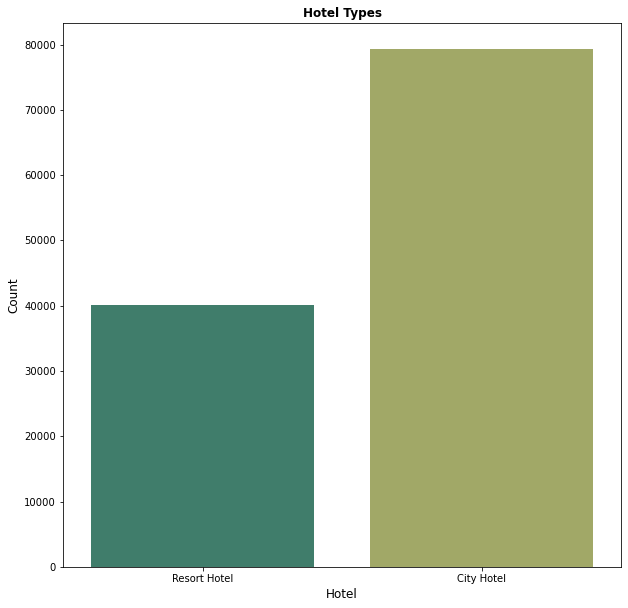

In [52]:
plt.figure(figsize=(10,10))
sns.countplot(x='hotel', data = hotel_df, palette='gist_earth')
plt.title('Hotel Types', weight='bold')
plt.xlabel('Hotel', fontsize=12)
plt.ylabel('Count', fontsize=12)

Text(0, 0.5, 'Count')

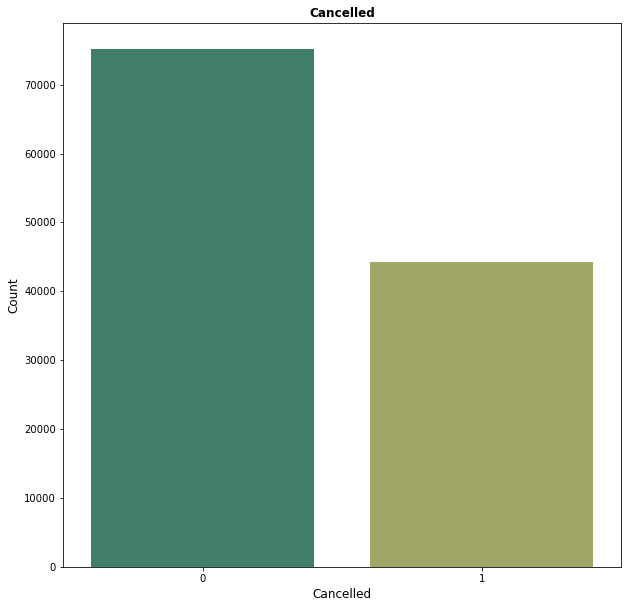

In [53]:
hotel_df['is_canceled'].unique()
plt.figure(figsize=(10,10))
sns.countplot(x='is_canceled', data = hotel_df, palette='gist_earth')
plt.title('Cancelled', weight='bold')
plt.xlabel('Cancelled', fontsize=12)
plt.ylabel('Count', fontsize=12)

In [ ]:
sns.countplot(data=hotel_df,
             x='arrival_date_year', hue='hotel')
plt.title('Reservations per year', weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of reservations', fontsize=12)
plt.show()

sns.countplot(data=hotel_df,
              x='arrival_date_month', hue='hotel')
plt.title('Reservations per month', weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of reservations', fontsize=12)
plt.xticks(rotation=60)
plt.show()

# sns.countplot(data=hotel_df,
#               x='adr', hue='hotel')
# plt.title('ADR', weight='bold')
# plt.xlabel('ADR', fontsize=12)
# plt.ylabel('Number of reservations', fontsize=12)
# plt.show()

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x='reservation_status', data = hotel_df, palette='gist_earth')
plt.title('Reservations', weight='bold')
plt.xlabel('Reservation Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

Podstawowe statystyki opisowe danych liczbowych

In [ ]:
hotel_df[['adr', 'adults', 'stays_in_week_nights', 'stays_in_weekend_nights', 'lead_time']].describe()

In [ ]:
hotel_df['market_segment'].unique()



In [ ]:
hotel_df['agent'].unique()

In [ ]:
hotel_df['deposit_type'].unique()